In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [ ]:
teams_df = pd.read_csv("Teams.csv")
playoffs_df = pd.read_csv("PlayoffTeams.csv")
salaries_df = pd.read_csv("Salaries.csv")
franchises_df = pd.read_csv("TeamsFranchises.csv")
teams_df.head()
teams_df.count

<bound method DataFrame.count of       yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
0       1871  NaN    BS1      BNA   NaN     3   31    NaN  20  10  ...    NaN   
1       1871  NaN    CH1      CNA   NaN     2   28    NaN  19   9  ...    NaN   
2       1871  NaN    CL1      CFC   NaN     8   29    NaN  10  19  ...    NaN   
3       1871  NaN    FW1      KEK   NaN     7   19    NaN   7  12  ...    NaN   
4       1871  NaN    NY2      NNA   NaN     5   33    NaN  16  17  ...    NaN   
...      ...  ...    ...      ...   ...   ...  ...    ...  ..  ..  ...    ...   
2800    2015   NL    LAN      LAD     W     1  162   81.0  92  70  ...  133.0   
2801    2015   NL    SFN      SFG     W     2  162   81.0  84  78  ...  145.0   
2802    2015   NL    ARI      ARI     W     3  162   81.0  79  83  ...  146.0   
2803    2015   NL    SDN      SDP     W     4  162   81.0  74  88  ...  138.0   
2804    2015   NL    COL      COL     W     5  162   81.0  68  94  ...  171.

In [ ]:
# clean up Teams dataframes to chosen years (2005-2015)

teams_df = teams_df.loc[teams_df['yearID'] > 2004]
teams_df.count
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
playoffs_df.count
salaries_df = salaries_df.loc[salaries_df['yearID'] > 2004]

In [ ]:
winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
winners_df.head()
winners_df.count()
#losers_df
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
losers_df.head()
losers_df.count()

print(winners_df)
print(losers_df)

    teamIDwinner
222          CHA
224          LAA
225          HOU
226          SLN
229          DET
231          OAK
233          NYN
236          BOS
238          CLE
239          COL
240          ARI
243          TBA
246          PHI
247          LAN
250          NYA
257          TEX
260          SFN
269          MIL
271          BAL
284          PIT
289          KCA
301          TOR
302          CHN
    teamIDloser
222         LAA
223         BOS
224         NYA
225         SLN
226         SDN
227         ATL
228         HOU
229         OAK
231         MIN
232         NYN
233         LAN
235         DET
236         CLE
239         ARI
240         CHN
241         PHI
242         COL
245         CHA
248         MIL
249         TBA
261         CIN
263         TEX
273         BAL
277         WAS
286         PIT
297         KCA
299         TOR


In [17]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()

In [125]:
#MONEY SECTION
#How much is a team that got to the playoffs between 2005-2015 spending #per year
# #What is the average per team per general player per    
# Create 2 dataframes answering 2 objectives:
# salaries_describe['Sum'] - How much is a play offs team spends total per year 
# salaries_describe['mean'] - How much the playoff team spends per general player per year
# top_ten_sum; top_ten_mean - Find the teams that spend Too Much - top 10% (?) 
# Make Bar graph for 1 and 2

salaries_test_df = salaries_df.loc[salaries_df['teamID'].isin(playoff_count_df.index)]

salaries_test_df = salaries_test_df.groupby(['yearID', 'teamID'])
salaries_describe = salaries_test_df.describe()
salaries_describe['salary','Sum'] = salaries_test_df.sum()

quantile_09 = salaries_describe.quantile(.9)

top_ten_mean = salaries_describe.loc[salaries_describe['salary','mean']>quantile_09['salary']['mean']]
top_ten_sum = salaries_describe.loc[salaries_describe['salary','Sum']>quantile_09['salary']['Sum']]



In [127]:
top_ten_mean

salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
2005   NYA      26.0  8.011801e+06  7.117015e+06  317200.0  2187500.00   
2006   NYA      28.0  6.952253e+06  7.343890e+06  328600.0   912500.00   
2007   NYA      28.0  6.759252e+06  7.725153e+06  382048.0   450042.25   
2008   NYA      30.0  6.929893e+06  8.164959e+06  390000.0   400312.50   
2009   CHN      25.0  5.392360e+06  6.194445e+06  400000.0   500000.00   
       NYA      26.0  7.748046e+06  8.596408e+06  400000.0   438506.25   
       NYN      28.0  5.334785e+06  5.607904e+06  400000.0  1093750.00   
2010   BOS      29.0  5.601632e+06  5.100972e+06  415500.0   905000.00   
       CHN      27.0  5.429963e+06  6.625155e+06  400000.0   750000.00   
       NYA      25.0  8.253336e+06  9.267188e+06  410800.0   487975.00   
2011   BOS      27.0  5.991203e+06  5.576433e+06  417000.0   887500.00   
       NYA      29.0  6.975001e+06  8.531288e+06  419300.0   650000.00   
       PHI      30.0  5.765879e+06  6.227551e+06  414000.0   570000.00   
2012   LAA      29.0  5.327075e+06  6.212772e+06  480000.0   500000.00   
       NYA      29.0  6.776631e+06  8.119776e+06  482000.0   528475.00   
       PHI      30.0  5.817965e+06  6.833158e+06  480000.0   497500.00   
2013   DET      24.0  6.082896e+06  6.873032e+06  490000.0   763750.00   
       LAN      32.0  6.980069e+06  7.203055e+06  490500.0  1215500.00   
       NYA      31.0  7.483190e+06  8.784431e+06  490000.0   546812.50   
       PHI      26.0  6.533200e+06  8.200819e+06  490000.0   507500.00   
2014   DET      23.0  6.645891e+06  7.276494e+06  500000.0   515000.00   
       LAN      32.0  6.781706e+06  7.414982e+06  501000.0   925000.00   
       NYA      24.0  8.230996e+06  8.609457e+06  502100.0   537918.75   
       PHI      32.0  5.654530e+06  7.551086e+06  500000.0   500000.00   
       SFN      28.0  5.839649e+06  5.751721e+06  500500.0   848750.00   
2015   BOS      32.0  5.659481e+06  6.241481e+06  508500.0   539875.00   
       DET      25.0  6.891390e+06  8.081387e+06  507500.0   520000.00   
       LAN      29.0  7.441103e+06  8.570340e+06  510000.0   693000.00   
       NYA      29.0  7.336274e+06  8.355235e+06  507500.0   554100.00   
       SFN      27.0  6.100056e+06  6.091981e+06  509000.0  1275000.00   
       WAS      29.0  5.365085e+06  5.965111e+06  507500.0   525000.00   

                                                              
                     50%          75%         max        Sum  
yearID teamID                                                 
2005   NYA     5833333.5  12839285.75  26000000.0  208306817  
2006   NYA     2925000.0  12250000.00  21680727.0  194663079  
2007   NYA     2250000.0  12250000.00  23428571.0  189259045  
2008   NYA     2437500.0  13000000.00  28000000.0  207896789  
2009   CHN     2200000.0   9000000.00  18750000.0  134809000  
       NYA     5200000.0  13075000.00  33000000.0  201449189  
       NYN     2612500.0   8104166.50  19243682.0  149373987  
2010   BOS     3750000.0   9000000.00  18700000.0  162447333  
       CHN     2125000.0  12875000.00  19000000.0  146609000  
       NYA     5500000.0  13100000.00  33000000.0  206333389  
2011   BOS     5500000.0  11166666.50  17000000.0  161762475  
       NYA     2700000.0  10000000.00  32000000.0  202275028  
       PHI     2625000.0  10250000.00  20000000.0  172976379  
2012   LAA     3150000.0   9000000.00  24187500.0  154485166  
       NYA     2800000.0  10250000.00  30000000.0  196522289  
       PHI     1875000.0  10475000.00  21500000.0  174538938  
2013   DET     3750000.0   7243750.00  23000000.0  145989500  
       LAN     4230749.5  12104166.75  21857143.0  223362196  
       NYA     2850000.0  13500000.00  29000000.0  231978886  
       PHI     1375000.0  12500000.00  25000000.0  169863189  
2014   DET     2500000.0  13000000.00  22000000.

In [126]:
top_ten_sum

salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
2005   NYA      26.0  8.011801e+06  7.117015e+06  317200.0  2187500.00   
2006   NYA      28.0  6.952253e+06  7.343890e+06  328600.0   912500.00   
2007   NYA      28.0  6.759252e+06  7.725153e+06  382048.0   450042.25   
2008   NYA      30.0  6.929893e+06  8.164959e+06  390000.0   400312.50   
2009   NYA      26.0  7.748046e+06  8.596408e+06  400000.0   438506.25   
       NYN      28.0  5.334785e+06  5.607904e+06  400000.0  1093750.00   
2010   BOS      29.0  5.601632e+06  5.100972e+06  415500.0   905000.00   
       CHN      27.0  5.429963e+06  6.625155e+06  400000.0   750000.00   
       NYA      25.0  8.253336e+06  9.267188e+06  410800.0   487975.00   
2011   BOS      27.0  5.991203e+06  5.576433e+06  417000.0   887500.00   
       NYA      29.0  6.975001e+06  8.531288e+06  419300.0   650000.00   
       PHI      30.0  5.765879e+06  6.227551e+06  414000.0   570000.00   
2012   BOS      34.0  5.093724e+06  6.311422e+06  482000.0   756250.00   
       LAA      29.0  5.327075e+06  6.212772e+06  480000.0   500000.00   
       NYA      29.0  6.776631e+06  8.119776e+06  482000.0   528475.00   
       PHI      30.0  5.817965e+06  6.833158e+06  480000.0   497500.00   
2013   BOS      29.0  5.225172e+06  4.829211e+06  498000.0  1475000.00   
       LAN      32.0  6.980069e+06  7.203055e+06  490500.0  1215500.00   
       NYA      31.0  7.483190e+06  8.784431e+06  490000.0   546812.50   
       PHI      26.0  6.533200e+06  8.200819e+06  490000.0   507500.00   
2014   DET      23.0  6.645891e+06  7.276494e+06  500000.0   515000.00   
       LAN      32.0  6.781706e+06  7.414982e+06  501000.0   925000.00   
       NYA      24.0  8.230996e+06  8.609457e+06  502100.0   537918.75   
       PHI      32.0  5.654530e+06  7.551086e+06  500000.0   500000.00   
       SFN      28.0  5.839649e+06  5.751721e+06  500500.0   848750.00   
2015   BOS      32.0  5.659481e+06  6.241481e+06  508500.0   539875.00   
       DET      25.0  6.891390e+06  8.081387e+06  507500.0   520000.00   
       LAN      29.0  7.441103e+06  8.570340e+06  510000.0   693000.00   
       NYA      29.0  7.336274e+06  8.355235e+06  507500.0   554100.00   
       SFN      27.0  6.100056e+06  6.091981e+06  509000.0  1275000.00   
       WAS      29.0  5.365085e+06  5.965111e+06  507500.0   525000.00   

                                                              
                     50%          75%         max        Sum  
yearID teamID                                                 
2005   NYA     5833333.5  12839285.75  26000000.0  208306817  
2006   NYA     2925000.0  12250000.00  21680727.0  194663079  
2007   NYA     2250000.0  12250000.00  23428571.0  189259045  
2008   NYA     2437500.0  13000000.00  28000000.0  207896789  
2009   NYA     5200000.0  13075000.00  33000000.0  201449189  
       NYN     2612500.0   8104166.50  19243682.0  149373987  
2010   BOS     3750000.0   9000000.00  18700000.0  162447333  
       CHN     2125000.0  12875000.00  19000000.0  146609000  
       NYA     5500000.0  13100000.00  33000000.0  206333389  
2011   BOS     5500000.0  11166666.50  17000000.0  161762475  
       NYA     2700000.0  10000000.00  32000000.0  202275028  
       PHI     2625000.0  10250000.00  20000000.0  172976379  
2012   BOS     1556250.0   7943750.00  21857142.0  173186617  
       LAA     3150000.0   9000000.00  24187500.0  154485166  
       NYA     2800000.0  10250000.00  30000000.0  196522289  
       PHI     1875000.0  10475000.00  21500000.0  174538938  
2013   BOS     4100000.0   9000000.00  15950000.0  151530000  
       LAN     4230749.5  12104166.75  21857143.0  223362196  
       NYA     2850000.0  13500000.00  29000000.0  231978886  
       PHI     1375000.0  12500000.00  25000000.0  169863189  
2014   DET     2500000.0  13000000.00  22000000.

28

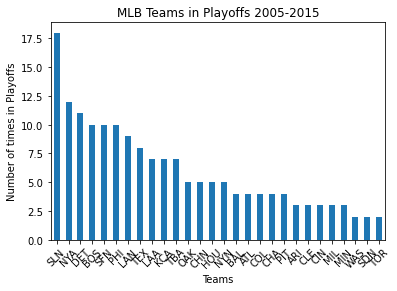

In [18]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])

playoff_count_df = playoff_count_df.value_counts()

playoff_chart = playoff_count_df.plot.bar(rot=45)
plt.title("MLB Teams in Playoffs 2005-2015")
plt.xlabel("Teams")
plt.ylabel("Number of times in Playoffs")
playoff_chart
playoff_count_df.count()